In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

Using TensorFlow backend.


# IMDB Movie reviews sentiment classification

https://raw.githubusercontent.com/keras-team/keras/master/examples/imdb_cnn.py

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.



In [3]:
imdb.load_data?

Signature:
imdb.load_data(
    path='imdb.npz',
    num_words=None,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,
    **kwargs,
)
Docstring:
Loads the IMDB dataset.

# Arguments
    path: where to cache the data (relative to `~/.keras/dataset`).
    num_words: max number of words to include. Words are ranked
        by how often they occur (in the training set) and only
        the most frequent words are kept
    skip_top: skip the top N most frequently occurring words
        (which may not be informative).
    maxlen: sequences longer than this will be filtered out.
    seed: random seed for sample shuffling.
    start_char: The start of a sequence will be marked with this character.
        Set to 1 because 0 is usually the padding character.
    oov_char: words that were cut out because of the `num_words`
        or `skip_top` limit will be replaced with this character.
    index_from: index actual words with this index and high

In [4]:
# load data

max_features = 5000
maxlen = 400

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=42,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

17465344/17464789 [==============================] - 6s 0us/step
25000 train sequences
25000 test sequences


In [5]:
print(x_train[:2])

[list([1, 11, 4079, 11, 4, 1986, 745, 3304, 299, 1206, 590, 3029, 1042, 37, 47, 27, 1269, 2, 2, 19, 6, 3586, 15, 1367, 3196, 17, 1002, 723, 1768, 2887, 757, 46, 4, 232, 1131, 39, 107, 3589, 11, 4, 4539, 198, 24, 4, 1834, 133, 4, 107, 7, 98, 413, 2, 2, 11, 35, 781, 8, 169, 4, 2179, 5, 259, 334, 3773, 8, 4, 3497, 10, 10, 17, 16, 3381, 46, 34, 101, 612, 7, 84, 18, 49, 282, 167, 2, 2, 122, 24, 1414, 8, 177, 4, 392, 531, 19, 259, 15, 934, 40, 507, 39, 2, 260, 77, 8, 162, 2, 121, 4, 65, 304, 273, 13, 70, 1276, 2, 8, 15, 745, 3304, 5, 27, 322, 2197, 2, 2, 70, 30, 2, 88, 17, 6, 3029, 1042, 29, 100, 30, 4943, 50, 21, 18, 148, 15, 26, 2, 12, 152, 157, 10, 10, 21, 19, 3196, 46, 50, 5, 4, 1636, 112, 828, 6, 1003, 4, 162, 2, 2, 517, 6, 2, 7, 4, 2, 2, 4, 351, 232, 385, 125, 6, 1693, 39, 2383, 5, 29, 69, 2, 2, 6, 162, 2, 1567, 232, 256, 34, 718, 2, 2980, 8, 6, 226, 762, 7, 2, 2, 5, 517, 2, 6, 3242, 7, 4, 351, 232, 37, 9, 1861, 8, 123, 3196, 2, 2, 188, 2, 857, 11, 4, 86, 22, 121, 29, 1990, 1495, 10, 1

In [6]:
print(y_train[:100])

[1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1
 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1
 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0]


## Pad sequences to the same length.

This function transforms a list of num_samples sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps). num_timesteps is either the maxlen argument if provided, or the length of the longest sequence otherwise.

Sequences that are shorter than num_timesteps are padded with value at the end.

Sequences longer than num_timesteps are truncated so that they fit the desired length. The position where padding or truncation happens is determined by the arguments padding and truncating, respectively.

Pre-padding is the default.

In [9]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 400)
x_test shape: (25000, 400)


In [10]:
print(x_train[:100])

[[  10   10   17 ...    4  392  555]
 [   0    0    0 ...  194  194  164]
 [   0    0    0 ...    5   55  441]
 ...
 [   0    0    0 ...   35 2076 1528]
 [   0    0    0 ...   12   70   79]
 [   0    0    0 ...  425   18   14]]


In [11]:
print(y_train[:100])

[1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1
 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1
 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0]


In [14]:
# set hyperparameters:
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

In [15]:
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
__________

In [18]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 85s 3ms/step - loss: 0.1675 - acc: 0.9362 - val_loss: 0.2653 - val_acc: 0.8901
Epoch 2/2
25000/25000 [==============================] - 90s 4ms/step - loss: 0.1122 - acc: 0.9595 - val_loss: 0.3470 - val_acc: 0.8733


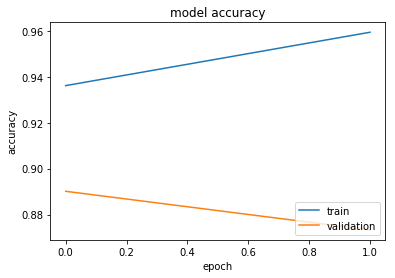

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'lower right')
plt.show()